In [1]:
import pandas as pd

data = pd.read_csv("C:\\Users\\Lorenzo\\Downloads\\archive (2)\RAW_recipes.csv")

In [2]:
data.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [47]:
tags = data['tags'].apply(eval)
ingredients = data['ingredients'].apply(eval)

In [48]:
all_tags_unique = tags.explode().unique()
all_ingredients_unique = ingredients.explode().unique()

In [49]:
print(f'Unique tags ({len(all_tags_unique)}): , {all_tags_unique}')

Unique tags (552): , ['60-minutes-or-less' 'time-to-make' 'course' 'main-ingredient' 'cuisine'
 'preparation' 'occasion' 'north-american' 'side-dishes' 'vegetables'
 'mexican' 'easy' 'fall' 'holiday-event' 'vegetarian' 'winter' 'dietary'
 'christmas' 'seasonal' 'squash' '30-minutes-or-less' 'breakfast'
 'main-dish' 'pork' 'american' 'oven' 'kid-friendly' 'pizza'
 'northeastern-united-states' 'meat' 'equipment' 'chili'
 'crock-pot-slow-cooker' '4-hours-or-less' 'eggs-dairy' 'potatoes'
 'dinner-party' 'easter' 'cheese' 'stove-top' 'new-years' 'thanksgiving'
 'independence-day' 'st-patricks-day' 'valentines-day' 'inexpensive'
 'brunch' 'superbowl' 'presentation' 'served-hot' 'weeknight' 'canning'
 'condiments-etc' 'heirloom-historical' 'amish-mennonite'
 'number-of-servings' 'technique' '15-minutes-or-less' 'low-protein'
 '5-ingredients-or-less' 'beverages' 'fruit' 'low-sodium' 'shakes'
 'low-calorie' 'low-in-something' 'apples' 'served-cold' '3-steps-or-less'
 'appetizers' 'canadian' 've

In [50]:
print(f'Unique ingredients ({len(all_ingredients_unique)}): , {all_ingredients_unique}')

Unique ingredients (14942): , ['winter squash' 'mexican seasoning' 'mixed spice' ...
 "hunt's fire roasted diced tomatoes" 'skinless halibut fillet'
 'nepitella']


In [80]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import random

In [51]:
tag_matrix = pd.DataFrame(0, index=data.index, columns=all_tags_unique)

for i, tags in enumerate(tags):
    for tag in tags:
        tag_matrix.at[i, tag] = 1

print("Binary Tag Matrix:")
print(tag_matrix.head())

Binary Tag Matrix:
   60-minutes-or-less  time-to-make  course  main-ingredient  cuisine   
0                   1             1       1                1        1  \
1                   0             1       1                1        1   
2                   0             1       1                0        0   
3                   1             1       1                1        0   
4                   0             1       1                1        1   

   preparation  occasion  north-american  side-dishes  vegetables  ...   
0            1         1               1            1           1  ...  \
1            1         1               1            0           0  ...   
2            1         0               0            0           0  ...   
3            1         1               0            1           1  ...   
4            1         1               1            0           1  ...   

   shrimp-main-dish  pumpkin-bread  bread-pudding   
0                 0              0          

In [54]:
df = data.copy()

pca = PCA()
principal_components = pca.fit_transform(tag_matrix)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

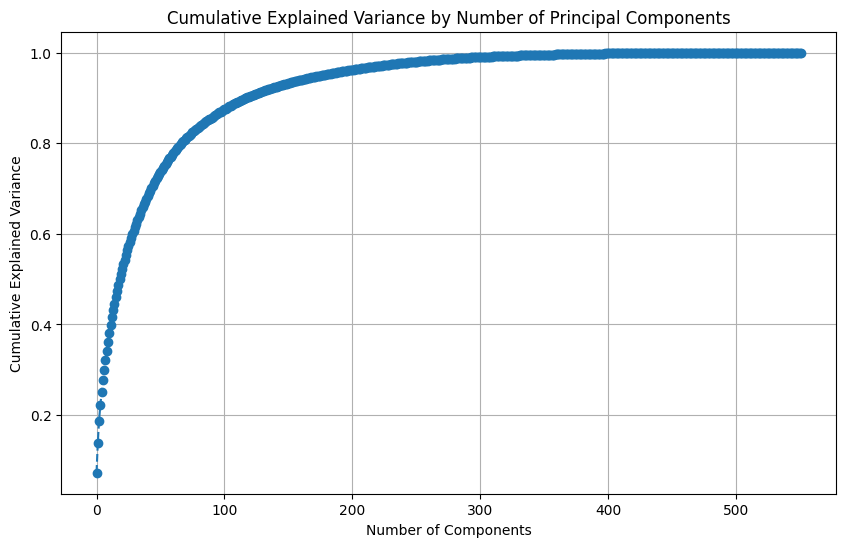

In [55]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

In [66]:
retained_variance = 0.95
n_components_optimal = np.argmax(cumulative_explained_variance >= retained_variance) + 1
print(f"Optimal number of components to retain {100*retained_variance}% variance: {n_components_optimal}")

# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components_optimal)
principal_components_optimal = pca_optimal.fit_transform(tag_matrix)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(principal_components_optimal, columns=[f'PC{i+1}' for i in range(n_components_optimal)])

# Add principal components to the original DataFrame
df = pd.concat([df, pca_df], axis=1)

Optimal number of components to retain 95.0% variance: 177


In [67]:
# Examine the PCA components (loadings)
loadings = pd.DataFrame(pca_optimal.components_.T, index=all_tags_unique, columns=[f'PC{i+1}' for i in range(n_components_optimal)])

print("\nPrincipal Components (Loadings):")
print(loadings)


Principal Components (Loadings):
                                                         PC1       PC2   
60-minutes-or-less                                 -0.057579  0.037379  \
time-to-make                                        0.004882 -0.001455   
course                                              0.004174  0.045096   
main-ingredient                                     0.038177  0.268485   
cuisine                                             0.040415  0.320639   
...                                                      ...       ...   
chicken-stews                                      -0.000005 -0.000003   
chicken-stew                                       -0.000005 -0.000003   
Throw the ultimate fiesta with this sopaipillas... -0.000005 -0.000007   
roast-beef-main-dish                               -0.000006 -0.000003   
roast-beef-comfort-food                            -0.000006 -0.000003   

                                                             PC3       PC4   

In [75]:
# Determine a threshold for significant loadings
threshold = 0.35  # This threshold can be adjusted based on the distribution of loadings
# Find the most significant tags for each principal component in the filtered loadings
significant_tags = loadings.apply(lambda x: x.index[np.abs(x) > threshold].tolist(), axis=0)
# Remove empty lists
significant_tags = significant_tags[significant_tags.apply(len) > 0]

print("\nMost Significant Tags for Each Filtered Principal Component (Non-Empty):")
print(significant_tags)


Most Significant Tags for Each Filtered Principal Component (Non-Empty):
PC1         [low-in-something]
PC2                 [occasion]
PC3                [main-dish]
PC4                     [easy]
PC5                  [cuisine]
                 ...          
PC168                 [easter]
PC169                  [broil]
PC171                  [bacon]
PC172                    [ham]
PC174    [chili, strawberries]
Length: 137, dtype: object


In [102]:
top_tags = significant_tags[:10].explode()
print(top_tags)
chosen = random.choice(top_tags)
print(f"I choose tag: {chosen}")
available_recipes = data[df['tags'].apply(lambda x: chosen in x)]
print(f"Available recipes with tag {chosen}: {len(available_recipes)}")
print(available_recipes['tags'].head())

PC1       low-in-something
PC2               occasion
PC3              main-dish
PC4                   easy
PC5                cuisine
PC6                cuisine
PC6         north-american
PC6             vegetables
PC7     60-minutes-or-less
PC7     30-minutes-or-less
PC7        4-hours-or-less
PC8     30-minutes-or-less
PC9              equipment
PC10    30-minutes-or-less
dtype: object
I choose tag: easy
Available recipes with tag easy: 126063
0     ['60-minutes-or-less', 'time-to-make', 'course...
1     ['30-minutes-or-less', 'time-to-make', 'course...
3     ['60-minutes-or-less', 'time-to-make', 'course...
5     ['15-minutes-or-less', 'time-to-make', 'course...
10    ['15-minutes-or-less', 'time-to-make', 'course...
Name: tags, dtype: object
